# Exploring AirBnB in Europe 

Airbnb’s rapid growth has transformed tourism in Europe, with travelers increasingly seeking local experiences. As a result, more and more properties have shifted to short-term rentals to meet this demand. This has sparked mixed opinions about the AirBnB phenomenon since there are many positive effects , such as the boost it provides for local economy but also some negative effects such as housing market pressure with prices on the rise for housing for local residents.

In this report, we will examine the reality of AirBnB in 13 European Cities and more specifically the following:
  * Amsterdam
  * Athens
  * Barcelona
  * Berlin
  * Copenhagen
  * Dublin
  * Lisbon
  * London
  * Madrid
  * Paris
  * Rome
  * Venice
  * Vienna

Our analysis examines Airbnb’s impact in each city, focusing on listing number, density, activity, data validation, and visualization, focusing in the last 12 months for which we have data. 

Our primary data source for this analysis is [Inside Airbnb](https://insideairbnb.com/get-the-data/), which provides publicly available and detailed information on Airbnb listings. 


---

> Elina (Evangelia) Kapetanaki<br />
> Department of Management Science and Technology <br />
> Major in Software and Data Analysis Technologies <br />
> Athens University of Economics and Business <br />
> t8210050@aueb.gr

The first step for our analysis is to import needed libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
import plotly.graph_objects as go
from ipywidgets import Dropdown, Output, VBox, HBox, HTML as WidgetHTML
from IPython.display import display, HTML
import folium
import json

Also, we would like to keep the names of the cities we will examine in a list, which we will use a lot.

In [2]:
cities = ['amsterdam', 'athens', 'barcelona', 'berlin', 'copenhagen', 'dublin', 
          'lisbon', 'london', 'madrid', 'paris', 'rome', 'venice', 'vienna']

## Getting the data

In order to read the data we download the data from [Inside Airbnb](https://insideairbnb.com/get-the-data/) for each city for the last 12 months. 

Data in Inside AirBnB for each city are per quarter, meaning per 3 months over a 12 month period. So 4 quarterly AirBnB data files complete a 12 month period. So for each city we download the 4 quarterly files available (exept from Berlin where we have 3 quarterly data files available).

We will take the datasets with title "Summary information and metrics for listings" which has all the columns we need for the analysis.

### Data Folder
We put these 4 files for each city in a folder **data/(name of the city)** in lower case letters. We put the listings name in order of the recency of the data starting counting from 1 to 4 starting from the most recent file to the last in the format **listings_(index of recency)**.

For example, for Athens we will have "data/athens" folder where inside the folder we have "listings_1.csv" "listings_2.csv" "listings_3.csv" "listings_4.csv" where "listings_1.csv" is the most recent dataset and "listings_4.csv" is the least recent dataset.

### Reading the data
After setting up our data folder, we read our data and put them in a **combined Data Frame** which we call <code>city_data_12_months</code>. In that Data Frame we add 2 columns:
* <code>city_data_12_months['City']</code> : the city of the listing ex.'Athens'
* <code>city_data_12_months['latest']</code> : True if the listing comes from the latest dataset / False otherwise.

In [3]:
# Initialize a list to collect all city data before concatenation
all_cities_data = []

# Loop over each city
for city in cities:
    # Set the number of files to process based on the city
    file_count = 3 if city == 'berlin' else 4
    
    # Loop over each file number for the city
    for i in range(1, file_count + 1):
        # Load the data, add "latest" and "City" columns
        city_data = pd.read_csv(f'data/{city}/listings_{i}.csv').assign(
            latest=(i == 1),  # True for listings_1.csv, False otherwise
            City=city.capitalize()
        )
        
        all_cities_data.append(city_data)

# Concatenate all data at once, filtering for unique listings by 'id'
city_data_12_months = (pd.concat(all_cities_data, ignore_index=True)
                       .drop_duplicates(subset='id', keep='first'))


The columns we have in our Data Frame are the following:

In [4]:
city_data_12_months.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'latest',
       'City'],
      dtype='object')

And let's also take a look at our data.

In [5]:
city_data_12_months.head(3)

id                                               name  host_id  \
0   2818          Quiet Garden View Room & Super Fast Wi-Fi     3159   
1  27886  Romantic, stylish B&B houseboat in canal district    97647   
2  28871                            Comfortable double room   124245   

  host_name neighbourhood_group                           neighbourhood  \
0    Daniel                 NaN  Oostelijk Havengebied - Indische Buurt   
1      Flip                 NaN                            Centrum-West   
2     Edwin                 NaN                            Centrum-West   

   latitude  longitude     room_type  price  minimum_nights  \
0  52.36435    4.94358  Private room   83.0               3   
1  52.38761    4.89188  Private room  155.0               3   
2  52.36775    4.89092  Private room   79.0               2   

   number_of_reviews last_review  reviews_per_month  \
0                389  2024-08-31               2.07   
1                279  2024-09-03               1.81   
2                638  2024-09-03               3.73   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               105                     35   
1                               1               193                     18   
2                               2                74                    100   

                    license  latest       City  
0  0363 5F3A 5684 6750 D14D    True  Amsterdam  
1  0363 974D 4986 7411 88D8    True  Amsterdam  
2  0363 607B EA74 0BD8 2F6F    True  Amsterdam

And let's also see how many lines we have at hand.

In [6]:
city_data_12_months.shape

(487801, 20)

## Number of AirBnB Listings per City

We would like to compare the number of AirBnBs in each of the 13 cities, using <code>.groupby('City')</code>.

In [7]:
listings_df = city_data_12_months.groupby('City').size().reset_index(name='Number of Listings').sort_values(by='Number of Listings', ascending=False)
listings_df.reset_index(drop=True, inplace=True)
listings_df

City  Number of Listings
0       London              129659
1        Paris              118803
2         Rome               39545
3       Madrid               35542
4       Lisbon               28914
5   Copenhagen               24927
6    Barcelona               24859
7       Vienna               19381
8       Athens               17112
9       Berlin               15830
10      Dublin               12196
11   Amsterdam               11342
12      Venice                9691

And we can also see these data in a plot to highlight the differences in number of listings per city using <code>pyplot</code> by <code>matplotlib</code>.

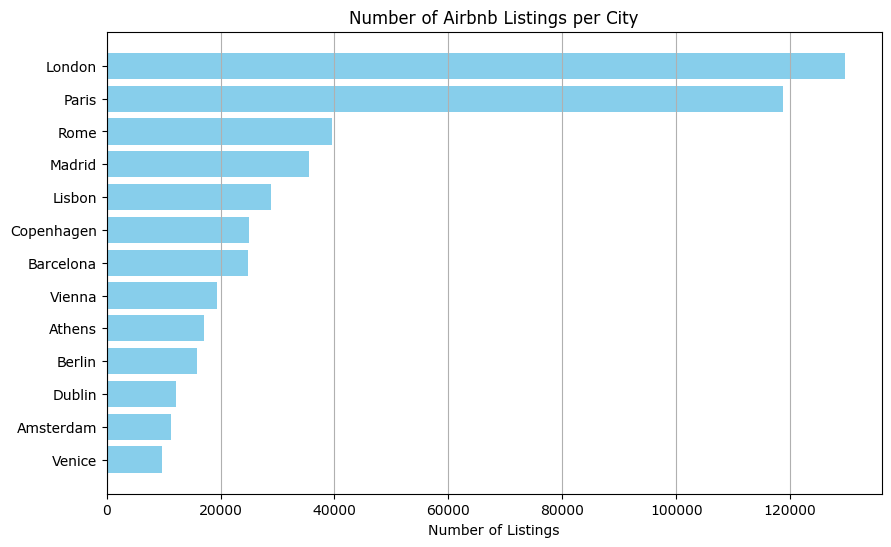

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(listings_df['City'], listings_df['Number of Listings'], color='skyblue')
plt.xlabel('Number of Listings')
plt.title('Number of Airbnb Listings per City')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()

* We see that London and Paris have by far the largest number of AirBnBs.

* Something interesting to note here is to check whether the high Airbnb numbers in London and Paris align with their global tourism rankings

* According to [Wikipedia](https://en.wikipedia.org/wiki/List_of_cities_by_international_visitors) 2023 top 10 ranking, London is the second most visited city in the World, after Instanbul (1st). The next European country in the ranking is Paris (5th). So this demand can justify at a point our findings. 

## AirBnB Density per City

*A short terminology for the chapter*
* *GeoJSON file*: A JSON format for encoding geographic shapes like polygons (borders in map) with geographical coordinates.
* *.TIFF file*: A high-quality image format often used for geospatial data, typically with layers for storing information.

<br>
We are going to calculate for every city the density of AirBnBs, meaning the number of AirBnB listings per 1,000 inhabitants.

To make this calculation we need:
1) The number of listings of each city, which we can can find from the <code>city_data_12_months</code> Data Frame.
2) The population size of each city, which we must find from an external reliable source.

However, there is a critical consideration: **Inside Airbnb may not adhere to official city boundaries** as we typically see them on maps like Google Maps. When comparing the areas on Inside Airbnb with those on Google Maps, we notice discrepancies in the boundaries of several cities.

### Illustrating the Discrepancy: Athens and Lisbon
To visualize and understand this discrepancy, we looked at the areas covered by Inside Airbnb for Athens and Lisbon as examples and we compared:

* The <code>'neighbourhoods.geojson'</code> files for the 2 cities, showing the area InsideAirBnB has taken.
* The official city boundaries of the 2 cities in <code>'.geojson'</code> format, using [Overpass Turbo](https://overpass-turbo.eu/), with which we can query [OpenStreetMap](https://www.openstreetmap.org) where all geographical coordinate data of the world are held.

At Overpass Turbo we used the following queries and we exported the files produced as <code>'city.geojson'</code> and put them at the <code>athens/</code> and the <code>lisbon/</code> folders.

Overpass Turbo queries:
* For Athens:

This query retrieves the administrative boundary for the central Athens district, which we can compare to the neighborhoods on Inside Airbnb’s map.

* For Lisbon:

This retrieves the boundary for the Lisbon city, which we can compare with Inside Airbnb’s neighborhood data.

And here we create the Athens map. **In case the map does not render please reload the page or run the code.**

In [9]:
# Create a base map centered around Athens
m = folium.Map(location=[37.9838, 23.7275], zoom_start=12)

# Add Athens city border in blue
with open('data/athens/city.geojson', 'r', encoding='utf-8') as f:
    athens_city_geojson = json.load(f)
folium.GeoJson(
    athens_city_geojson,
    style_function=lambda x: {'color': 'blue', 'weight': 2},
    name='Athens City Border'
).add_to(m)

# Add neighborhoods layer in red
with open('data/athens/neighbourhoods.geojson', 'r', encoding='utf-8') as f:
    neighborhoods_geojson = json.load(f)
folium.GeoJson(
    neighborhoods_geojson,
    style_function=lambda x: {'color': 'red', 'weight': 1},
    name='Neighborhoods'
).add_to(m)

folium.LayerControl().add_to(m)

legend_html = """
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 200px; height: 90px;
                 background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
                 ">
     &nbsp; <b>Legend</b> <br>
     &nbsp; <i style="background:blue; color:blue; font-size:18px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> &nbsp; Official City Area <br>
     &nbsp; <i style="background:red; color:red; font-size:18px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> &nbsp; Inside Airbnb Area
     </div>
     """

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

m

* The area covered by Inside Airbnb in Athens is smaller than the actual Central Athens district, which we refer to as the City of Athens.

* This means the listings data might exclude parts of the city typically counted within the central Athens administrative boundary.

* In fact, the Inside Airbnb area in this case matches the [Municipality of Athens](https://www.google.com/maps/place/%CE%94%CE%97%CE%9C%CE%9F%CE%A3+%CE%91%CE%98%CE%97%CE%9D%CE%91%CE%99%CE%A9%CE%9D/@37.9915178,23.6978415,13z/data=!3m1!4b1!4m6!3m5!1s0x14a1a2caac91f869:0xb3c894f3510444d!8m2!3d37.9837818!4d23.7275817!16s%2Fg%2F11v4wmfgtj?hl=el&entry=ttu&g_ep=EgoyMDI0MTAyOS4wIKXMDSoASAFQAw%3D%3D).

Now let's see the Lisbon case.

In [10]:
# Create a base map centered around the Lisbon metro area
m_lisbon = folium.Map(location=[38.7169, -9.1399], zoom_start=9)

with open('data/lisbon/city.geojson', 'r', encoding='utf-8') as f:
    lisbon_metro_geojson = json.load(f)
    # Filter out Point geometries, keep only Polygons or MultiPolygons
    lisbon_metro_geojson['features'] = [
        feature for feature in lisbon_metro_geojson['features']
        if feature['geometry']['type'] in ['Polygon', 'MultiPolygon']
    ]

# Add Lisbon city
folium.GeoJson(
    lisbon_metro_geojson,
    style_function=lambda x: {
        'color': 'blue',            # Border color
        'weight': 2,                # Border thickness
        'fillColor': 'blue',        # Fill color
        'fillOpacity': 0.9          # Fill transparency
    },
    name='Lisbon City Border' 
).add_to(m_lisbon)

# Add neighborhoods layer on top
with open('data/lisbon/neighbourhoods.geojson', 'r', encoding='utf-8') as f:
    neighborhoods_geojson = json.load(f)
folium.GeoJson(
    neighborhoods_geojson,
    style_function=lambda x: {
        'color': 'red',           # Border color for neighborhoods
        'weight': 1,
        'fillOpacity': 0.2# Border thickness for neighborhood
    },
    name='Neighborhoods'
).add_to(m_lisbon)

folium.LayerControl().add_to(m_lisbon)

legend_html = """
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 200px; height: 90px;
                 background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
                 ">
     &nbsp; <b>Legend</b> <br>
     &nbsp; <i style="background:blue; color:blue; font-size:18px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> &nbsp; Official City Area <br>
     &nbsp; <i style="background:red; color:red; font-size:18px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> &nbsp; Inside Airbnb Area
     </div>
     """

# Add the legend to the map
m_lisbon.get_root().html.add_child(folium.Element(legend_html))

m_lisbon

* Here, the area covered by Inside Airbnb includes the entire [Lisbon District](https://en.wikipedia.org/wiki/Lisbon_District), which is considerably larger than the official Lisbon city limits.

* This discrepancy can lead to overestimating population density if we compare it to population data specific to Lisbon’s city boundary alone.

These mismatched boundaries significantly impact the accuracy of our population density calculations. Using population data for an area different from where the Airbnb listings are concentrated can lead to misleading conclusions. If the Airbnb data covers a smaller region than the population data, the density may appear artificially high; if it covers a larger area, the density could seem too low.

### Solution: Using GHSL - Global Human Settlement Layer
To ensure reliable area-based data, we have decided to use the **Global Human Settlement Layer (GHSL) population data**. The [GHSL](https://human-settlement.emergency.copernicus.eu/) is a dataset produced by the European Commission's Joint Research Centre, providing high-resolution data on population distributions accross geographical areas.

So to find the population for **each city** we will need:
* the <code>neighbouhood.geojson</code> file in Inside AirBnB, which contains the coordinates of the area of the listings
  
* GHSL's <code>.tiff</code> file found at this [link](https://human-settlement.emergency.copernicus.eu/download.php), when clicking at the tile in the map corresponding to the city we want (at coordinate system WGS84 because it is compatible with GeoJSON files and at epoch 2025 since it is the closest to 2024 when we examine our data)

* the Software [QGIS](https://www.qgis.org/), which will help align the information in the above 2 files.

After having all the above for **each city**, we follow the steps:
1) We open QGIS on our computer
2) We click <code>Layer > Add Layer > Add Vector Layer ></code> and we add our <code>neighbouhood.geojson</code> file.
3) We click <code>Layer > Add Layer > Add Raster Layer ></code> and we add our <code>.tiff</code> file.
4) On the "Processing Toolbox" we search for <code>Zonal Statistics</code> and we select it. We put as Input Layer the <code>neighbouhood.geojson</code> file and as Raster Layer our <code>.tiff</code> file and choose to calculate "sum" and we press "Run"
5) We right click on the output shown at the left side bar and we export it as <code>population.csv</code> at our <code>{city}/</code> folder.

Important things to note:
* The data provided by the Global Human Settlement Layer (GHSL) are surely not the latest as we can see at the metadata file that comes together with our <code>.tiff</code> file. The official census data used by GHSL date back 5-15 years, because they are not updated that often. This however is not that desruptive for our analysis because predictions are used to bring data close to 2024 and we fix our bigger problem of having reliable area-based data.
* Another datasource like GHSL is [WorldPop](https://www.worldpop.org/), with which we can also perform the same steps but the census data they use are older than those of GHSL as we can see at the input data the use for each data set ([example](https://hub.worldpop.org/geodata/summary?id=49980)).
* Datasources like [Eurostat](https://ec.europa.eu/eurostat) and [Geonames](https://www.geonames.org/) were examined at first as a source of reliable data but were declined because they don't offer ways to tackle the reliable area-based data problem.


Now let's test the accuracy of our population data by seeing the Athens population we got.

In [11]:
population_data_ath = pd.read_csv(f'data/athens/population.csv')
round(population_data_ath['_sum'].sum())

631122

According to [Municipality of Athens Wiki](https://el.wikipedia.org/wiki/%CE%94%CE%AE%CE%BC%CE%BF%CF%82_%CE%91%CE%B8%CE%B7%CE%BD%CE%B1%CE%AF%CF%89%CE%BD) (which matches the Inside AirBnB Athens area as we mentioned before) the population at the 2021 census was 637.798 inhabitants. So we can say our results are very close to reality. 

Now let's read for each city our population data and calculate the density per 1,000 inhabitants as :
$$
\text{Density per 1,000 inhabitants} = \left( \frac{\text{Number of Listings}}{\text{Population}} \right) \times 1000
$$

In [12]:
density_data = []

for city in cities:
    city_data = city_data_12_months[city_data_12_months['City'] == city.capitalize()]
    # Count listings
    listings_count = len(city_data)
    
    # Load population data
    population_data = pd.read_csv(f'data/{city}/population.csv')
    total_population = population_data['_sum'].sum()
    
    #Calculate density
    density_per_1000 = (listings_count / total_population) * 1000 if total_population > 0 else 0
    
    density_data.append([city.capitalize(), density_per_1000, total_population, listings_count])

And put the data on a DataFrame.

In [13]:
# Sort the DataFrame
density_df = pd.DataFrame(
    density_data,
    columns=['City', 'Density per 1,000 Inhabitants', 'Population', 'Number of Listings']
).sort_values(by='Density per 1,000 Inhabitants', ascending=False).reset_index(drop=True)

# Apply formatting to the entire DataFrame
density_df_formatted = density_df.copy()
density_df_formatted[['Population', 'Density per 1,000 Inhabitants', 'Number of Listings']] = density_df_formatted[
    ['Population', 'Density per 1,000 Inhabitants', 'Number of Listings']].map(lambda x: f"{x:,.0f}")
density_df_formatted

City Density per 1,000 Inhabitants Population Number of Listings
0        Paris                            53  2,256,392            118,803
1       Venice                            39    249,446              9,691
2   Copenhagen                            31    805,799             24,927
3       Athens                            27    631,122             17,112
4    Amsterdam                            14    788,722             11,342
5         Rome                            14  2,797,558             39,545
6    Barcelona                            13  1,856,565             24,859
7       London                            13  9,769,655            129,659
8       Lisbon                            12  2,428,447             28,914
9       Madrid                             9  3,789,245             35,542
10      Vienna                             9  2,078,538             19,381
11      Dublin                             8  1,463,934             12,196
12      Berlin                             4  3,628,008             15,830

And also make a plot to highlight the differences in density.

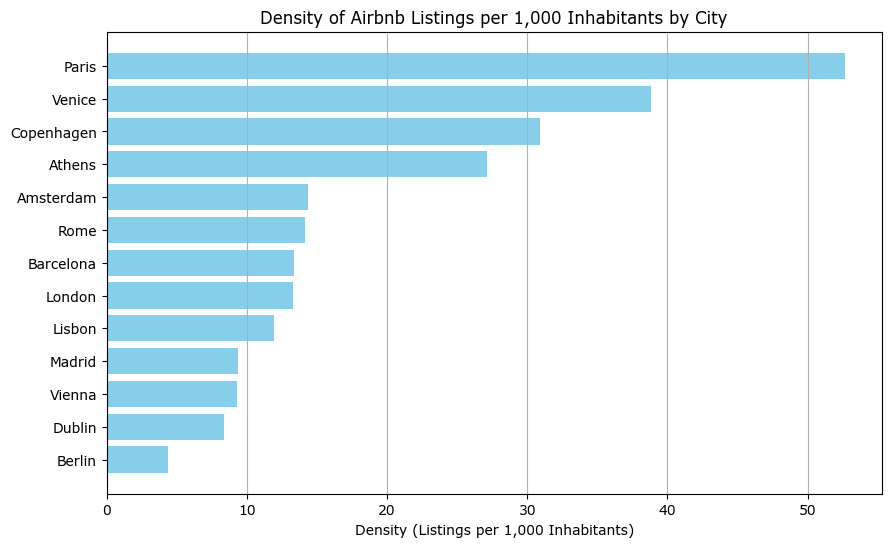

In [14]:
# Plotting Density of Listings
plt.figure(figsize=(10, 6))
plt.barh(density_df['City'], density_df['Density per 1,000 Inhabitants'], color='skyblue')
plt.xlabel('Density (Listings per 1,000 Inhabitants)')
plt.title('Density of Airbnb Listings per 1,000 Inhabitants by City')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()

* This means that in Paris for example we have 53 AirBnB listings in 1,000 inhabitants.

* We notice that Paris is at the top in terms of density and London which was first in terms of AirBnB listings number is now 8th in terms of density.

* So we would to also see a plot of the population by city.

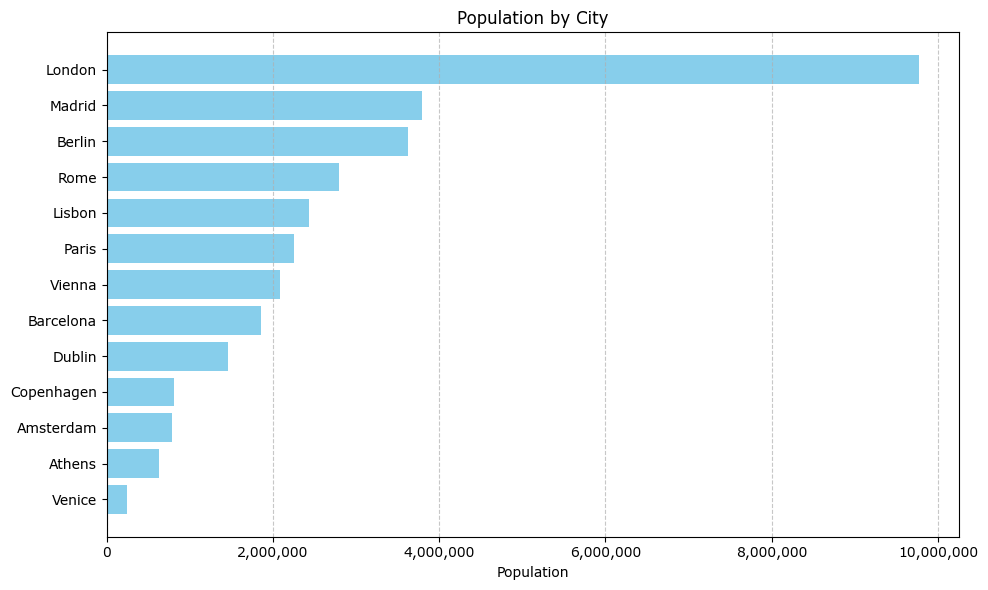

In [15]:
density_df_sorted_population = density_df.sort_values(by='Population', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(density_df_sorted_population['City'], density_df_sorted_population['Population'], color='skyblue')
plt.xlabel('Population')
plt.title('Population by City')
plt.gca().invert_yaxis()  # Highest population at the top
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}")) # Use commas for thousants
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

So we see that London has both the highest number of listings and the highest population, so it makes sense that its density goes down.

## Activity
We will calculate in the AirBnB bookings and income per listing for each city for the last 12 months.

We should note that we must only keep the latest listings that we have if we want to calculate AirBnB bookings and income per listing for each city for the last 12 months. So we will use the <code>'latest'</code> column we created to filter our data.

In [16]:
latest_data = city_data_12_months[city_data_12_months['latest'] == True].copy()

However we notice that there is no bookings number or nights spent column given with our data

In [17]:
latest_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'latest',
       'City'],
      dtype='object')

We have a column named <code>'number_of_reviews_ltm'</code> which according to the [Data Dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1938308660#gid=1938308660) is : The number of reviews the listing has (in the last 12 months).

We will use the following:

**Assumption 1** : 1 review per booking

**Assumption 2** : Half of the bookings have reviews, and each booking is for 3 nights.

Before we use the reviews let's check their min and max.

In [18]:
# Group by 'City' to calculate min and max reviews per city
reviews_stats = latest_data.groupby('City')['number_of_reviews_ltm'].agg(['min', 'max']).reset_index()

# Count listings with over 365 reviews
over_365_reviews_count = latest_data[latest_data['number_of_reviews_ltm'] > 365].groupby('City').size().reset_index(name='Over 365 Reviews Count')

reviews_stats = reviews_stats.merge(over_365_reviews_count, on='City', how='left').fillna(0)
reviews_stats['Over 365 Reviews Count'] = reviews_stats['Over 365 Reviews Count'].astype(int)
reviews_stats

City  min   max  Over 365 Reviews Count
0    Amsterdam    0   914                       6
1       Athens    0   207                       0
2    Barcelona    0  1287                       6
3       Berlin    0   512                       4
4   Copenhagen    0   758                       2
5       Dublin    0   343                       0
6       Lisbon    0   414                       2
7       London    0   303                       0
8       Madrid    0   299                       0
9        Paris    0   785                       2
10        Rome    0   573                       1
11      Venice    0   926                       3
12      Vienna    0   550                       2

* We see that we have a few extreme values.

* The column <code>'number_of_reviews_ltm'</code> is supposed to give the number of reviews the listing has (in the last 12 months).

* So, a value of 1287 (max of Barcelona) does not really make sense.

* Let's take the extreme senario that an AirBnB is booked every day by a guest and they leave a review everyday. In that extreme senario we would get 365 reviews, still a lot less than values like 1287.

* So we exclude these lines exceeding this from our dataset, to keep matters realistic.

In [19]:
latest_data_cleaned = latest_data[latest_data['number_of_reviews_ltm'] <= 365].copy()

* For each listing, the total nights spent per year is estimated using the formula:
$$
\text{Total Nights Spent} = \text{Reviews in 12 Months} \times 2 \times 3
$$

* We can't have more than 365 nights per 12 months for a listing.

* Setting the Maximum Total Nights Spent (365):

$$
\text{Reviews in 12 Months} \times 2 \times 3 \leq 365
$$

* However, it would be wrong to exclude completely the listings with high popularity because of our assumption.

* So we set the Number of Reviews for any lines exceeding this to the maximum they can take to stay in accordance with our assumptions while also not ignoring popular listings using the method <code>clip(upper={ })</code> on our Data Frame.

In [20]:
latest_data_cleaned['estimated_bookings'] = (latest_data_cleaned['number_of_reviews_ltm'] * 2).clip(upper=365/3)
latest_data_cleaned['estimated_nights_spent'] = latest_data_cleaned['estimated_bookings'] * 3
latest_data_cleaned['income_per_listing'] = latest_data_cleaned['price'] * latest_data_cleaned['estimated_nights_spent'] ##price is daily price 

# Group by city and calculate the mean
bookings_income_df = (
    latest_data_cleaned
    .groupby('City')
    .agg(
        Average_Bookings=('estimated_bookings', 'mean'),
        Average_Nights_Booked=('estimated_nights_spent', 'mean'),
        Average_Income_per_Listing=('income_per_listing', 'mean')
    )
    .round(0)
    .sort_values(by='Average_Bookings',ascending=False)
    .reset_index()
)
bookings_income_df[['Average_Bookings', 'Average_Nights_Booked', 'Average_Income_per_Listing']] = \
    bookings_income_df[['Average_Bookings', 'Average_Nights_Booked', 'Average_Income_per_Listing']].astype(int)

bookings_income_df

City  Average_Bookings  Average_Nights_Booked  \
0       Venice                36                    107   
1         Rome                29                     86   
2       Lisbon                28                     85   
3       Athens                27                     82   
4       Dublin                26                     78   
5       Madrid                26                     79   
6    Barcelona                22                     65   
7       Vienna                22                     65   
8       Berlin                17                     50   
9    Amsterdam                16                     49   
10      London                11                     33   
11       Paris                11                     33   
12  Copenhagen                10                     29   

    Average_Income_per_Listing  
0                        24166  
1                        16668  
2                        12838  
3                         8406  
4                        14346  
5                        11908  
6                        15368  
7                         9074  
8                        10992  
9                        14832  
10                        6866  
11                        8102  
12                       48220

* We see that Venice holds the first place when it comes to average bookings and nights booked.

* We see that the Average Bookings and the Average Nights Booked are not as high as we probably would have thought. However, it is a fact that in most countries there are restrictions as to how many days an AirBnB can be rented out ([Source: Euronews](https://www.euronews.com/travel/2023/06/11/italy-malaysia-usa-which-cities-and-countries-are-cracking-down-on-airbnb-style-rentals)). Also, many AirBnB listings use other platforms too for their bookings. With these things in mind our results make a lot of sense. 

* We are also interested in seeing the values of the <code>'Average_Income_per_Listing'</code> sorted.

In [21]:
bookings_income_df.sort_values(by='Average_Income_per_Listing',ascending=False).reset_index(drop=True)

City  Average_Bookings  Average_Nights_Booked  \
0   Copenhagen                10                     29   
1       Venice                36                    107   
2         Rome                29                     86   
3    Barcelona                22                     65   
4    Amsterdam                16                     49   
5       Dublin                26                     78   
6       Lisbon                28                     85   
7       Madrid                26                     79   
8       Berlin                17                     50   
9       Vienna                22                     65   
10      Athens                27                     82   
11       Paris                11                     33   
12      London                11                     33   

    Average_Income_per_Listing  
0                        48220  
1                        24166  
2                        16668  
3                        15368  
4                        14832  
5                        14346  
6                        12838  
7                        11908  
8                        10992  
9                         9074  
10                        8406  
11                        8102  
12                        6866

* We can see that Coopenhagen even tho the comperatively low average bookings number , has the highest income per listing exceding by far the second highest average income per listing which is Venice.

* This is explained since Coopenhagen is the Capital of Denmark, the most expensive country in our dataset according to [EuroStat](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Comparative_price_levels_of_consumer_goods_and_services).


## Cross - Check

We will now cross - check our data to check the validity of our data and of our assumptions.

However, AirBnB data are not publicly available for everyone to see in many sources.

So we will use data on the market of **short term rentals/accomodation** as a total and will interpret them accordingly.

**Data Sources** that will be used:

* Eurostat Annual Data (NUTS 3 Regions) 2023: [Guest nights spent at short-stay accommodation offered via collaborative economy platforms by NUTS 3 region - experimental statistics](https://ec.europa.eu/eurostat/databrowser/view/tour_ce_oan3/default/table?lang=en&category=tour.tour_ce.tour_ce_oa): This provides the total "nights spent" by tourists in specific regions (NUTS 3) that we will match as much as possible to each city of our analysis.

* Eurostat Annual 2019 country data: [Short-stay accommodation offered via collaborative economy platforms by residence of the guest and cities - experimental statistics](https://ec.europa.eu/eurostat/databrowser/view/tour_ce_oarc/default/table?lang=en&category=tour.tour_ce.tour_ce_oa)  to derive:
  *  Average length of stay in a short-term rental
  * Average travel group number (people traveling together)
 
More specifically, we will cross - check our results for Total Bookings	and Total Nights Spent for each city.

So let's first see our Total Bookings and Total Nights Spent for each city.

In [22]:
bookings_income_df = (
    latest_data_cleaned
    .groupby('City')
    .agg(
        Total_Bookings=('estimated_bookings', 'sum'),
        Total_Nights_Spent=('estimated_nights_spent', 'sum')
    )
    .round(0)
    .reset_index()
    .sort_values(by='Total_Bookings', ascending=False)
)

# Convert relevant columns to integers
bookings_income_df[['Total_Bookings', 'Total_Nights_Spent']] = \
    bookings_income_df[['Total_Bookings', 'Total_Nights_Spent']].astype(int)

bookings_income_df = bookings_income_df.sort_values(by='Total_Bookings', ascending=False).reset_index(drop=True)

# Make a copy to format numbers and use commas for thousants
bookings_income_df_formatted = bookings_income_df.copy()
bookings_income_df_formatted[['Total_Bookings', 'Total_Nights_Spent']] = \
    bookings_income_df_formatted[['Total_Bookings', 'Total_Nights_Spent']].map(lambda x: f"{x:,}")
bookings_income_df_formatted

City Total_Bookings Total_Nights_Spent
0       London      1,073,840          3,221,519
1        Paris      1,044,861          3,134,583
2         Rome        971,655          2,914,964
3       Madrid        708,673          2,126,019
4       Lisbon        683,721          2,051,163
5    Barcelona        421,014          1,263,042
6       Athens        363,949          1,091,847
7       Vienna        313,161            939,482
8       Venice        296,618            889,853
9       Berlin        227,647            682,942
10  Copenhagen        204,916            614,748
11      Dublin        160,432            481,295
12   Amsterdam        157,904            473,711

We download Eurostat Data (NUTS 3 Regions) 2024: [Guest nights spent at short-stay accommodation offered via collaborative economy platforms by NUTS 3 region - experimental statistics](https://ec.europa.eu/eurostat/databrowser/view/tour_ce_oan3/default/table?lang=en&category=tour.tour_ce.tour_ce_oa) and we put it inside the data folder as <code>data/eurostat_data.xlsx</code>.

We read the data.

In [23]:
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
eurostat_data = pd.read_excel('data/eurostat_data.xlsx', sheet_name='Sheet 1', skiprows=9)
eurostat_data_2023 = eurostat_data[['TIME', '2023']].dropna()
eurostat_data_2023.columns = ['NUTS3_Region', 'Nights_Spent_2023']

* We map our cities to NUTS 3 Region Level.

* Note that we only used the cities we could find at the Eurostat dataset (for example London which is not in the European Union was not in the dataset), but they are representive enough for our cross check.

In [24]:
# Mapping NUTS 3 region label names to city names
nuts3_to_city = {
    "Amsterdam": "Amsterdam",
    "Kentrikos Tomeas Athinon": "Athens",
    "Barcelona": "Barcelona",
    "Berlin": "Berlin",
    "Byen København": "Copenhagen",
    "Dublin": "Dublin",
    "Madrid": "Madrid",
    "Paris": "Paris",
    "Roma": "Rome",
    "Venezia": "Venice",
    "Wien": "Vienna"
}

eurostat_data_2023['City'] = eurostat_data_2023['NUTS3_Region'].map(nuts3_to_city)

* We show our nights spent 2023 Eurostat data.

In [25]:
eurostat_data_2023 = eurostat_data_2023.dropna(subset=['City']).sort_values(by='Nights_Spent_2023',ascending=False).reset_index(drop=True)
eurostat_data_2023['Nights_Spent_2023'] = eurostat_data_2023['Nights_Spent_2023'].astype(int)

# Create a formatted copy with commas for thousands in Nights_Spent_2023
eurostat_data_2023_formatted = eurostat_data_2023.copy()
eurostat_data_2023_formatted['Nights_Spent_2023'] = eurostat_data_2023_formatted['Nights_Spent_2023'].apply(lambda x: f"{x:,}")

# Display the formatted DataFrame with selected columns
eurostat_data_2023_formatted[['City', 'NUTS3_Region', 'Nights_Spent_2023']]

City              NUTS3_Region Nights_Spent_2023
0        Rome                      Roma        13,509,593
1   Barcelona                 Barcelona        12,715,643
2       Paris                     Paris        12,209,436
3      Madrid                    Madrid        10,096,657
4      Vienna                      Wien         5,783,462
5      Venice                   Venezia         5,499,954
6      Athens  Kentrikos Tomeas Athinon         5,296,869
7      Berlin                    Berlin         2,988,849
8  Copenhagen            Byen København         1,860,469
9      Dublin                    Dublin         1,490,696

* We immediatelly notice 2 things:

  * Paris, which was would be the 1st of these cities in our Nights Spent Ranking (2024) has gone 2 positions down.
  
  * Barcelona is 4 positions above than it was in our ranking.
  
  * The numbers of Nights Spent 2023 by Eurostat are significantly bigger than ours (ex. Paris in Eurostat DataSet: 12.209.436 and in InsideAirBnB DataSet: 3.134.583

* **All of the above can be explained**

  * Paris held the Olympic Games 2024 from July 26 to August 11 2024 and the Paralympic Games from August 28 to September 8 2024, so rentals in AirBnB had risen up a lot in that time period in Paris which is captured in our data but of course not in the 2023 data. Also, Paris is said to have risen in linstings number in the last year by 40% ([Source](https://www.rentalscaleup.com/2024-paris-olympics-mixed-outlook-for-frances-hospitality-industry-amid-airbnbs-surprising-data/))
 
  * Barcelona NUTS3 Area is the [Province of Barcelona](https://en.wikipedia.org/wiki/Province_of_Barcelona) which includes the city of Barcelona, but is significantly bigger than the city itself (79% more inhabitants than the city and 7,624.6 square kilometers larger)
 
  * As for the difference in the numbers: Fistly, in Eurostat's data there are nights spent at accomodations booked not only by AirBnB but also by Booking, Expedia etc. and secondly as we can see in [Eurostat's CETOUR Methodological note](https://ec.europa.eu/eurostat/documents/7894008/12961561/CETOUR-Methodological-note.pdf/1dee049f-5612-1b47-c7ce-75eacaf49790?t=1624886311053) (page 7), where Eurostat refers to *"Nights Spent"* it means *"the number of nights the accommodation was rented out, multiplied by the number of guests staying at the accommodation"*.
 
* Now let's try to bring the Eurostat's data closer to our data.

* We have to cater for 2 things:
  
  **1.** Conversion of "Nights spent" to just the number of nights the accommodation was rented out and,
    
  **2.** Isolation of AirBnB "Nights Spent"
 
* But first let's remove Bercelona from our Eurostat DataSet since it is not representative and comparable to our data.

In [26]:
eurostat_data_2023 = eurostat_data_2023[eurostat_data_2023['City'] != 'Barcelona']

* Now to convert "Nights Spent" from "the number of nights the accommodation was rented out, multiplied by the number of guests staying at the accommodation" to the number of nights the accommodation was rented out (to be comparable with our data) we must find and devide by the average size of group of people traveling together.

* For this reason we will download and use the Eurostat Annual 2019 (avoiding the Covid Period 2020-2021) country data: [Short-stay accommodation offered via collaborative economy platforms by residence of the guest and cities - experimental statistics](https://ec.europa.eu/eurostat/databrowser/view/tour_ce_oarc/default/table?lang=en&category=tour.tour_ce.tour_ce_oa) where we are given these 3 columns in 3 different sheets: <code>stays</code> (=bookings), <code>full_length_stays</code> (=stays multiplied by number of days of rental) and <code>nights_spent</code>(=stays multiplied by number of days of rental multipied by size of group of people traveling together). We don't mind using 2019 data since the number of people traveling together is not something that could have changed significantly in the last years.
$$
\text{Size of group traveling together} = \frac{\text{Nights Spent}}{\text{Full length stays}}
$$

* We read the excel sheets

In [27]:
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

file_path = 'data/tour_ce_oarc_spreadsheet.xlsx'

# Sheets and data
sheets = {
    'Sheet 3': 'stays',
    'Sheet 6': 'full_length_stays',
    'Sheet 9': 'nights_spent'
}

# Define the relevant countries
countries = ["Greece", "Spain", "Germany", "Denmark", "Ireland", "Portugal", "Spain", "France", "Italy", "Austria"]

# Read specified data from each sheet
dataframes = {}
for sheet_name, column_name in sheets.items():
    df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=9, usecols=["TIME", "2019"])
    df = df[df['TIME'].isin(countries)]
    df = df.rename(columns={'TIME': "Country", "2019": column_name})
    dataframes[column_name] = df.set_index("Country")
    
merged_df = dataframes['stays'].join(dataframes['full_length_stays']).join(dataframes['nights_spent'])

* We display the average travel group size.

In [28]:
# Calculate the average group size
merged_df['avg_group_size'] = (merged_df['nights_spent'] / merged_df['full_length_stays']).apply(lambda x: f"{x:.2f}")

merged_df

stays full_length_stays nights_spent avg_group_size
Country                                                        
Denmark    470859           1666940      4681072           2.81
Germany   4029410          15222798     37235826           2.45
Ireland    815912           2257671      6911663           3.06
Greece    2085220           8308884     24302149           2.92
Spain     7823317          33262477    105601983           3.17
France    9177050          34554668     99453335           2.88
Italy     7029669          25634265     76044409           2.97
Austria   1286474           4874485     15571981           3.19
Portugal  2408790          10005827     31063617           3.10

* It makes complete sense that no matter the country the people have similar behaviours and go with 2-3 people on average for a trip (solo travelers, couples, family or friends).

* According to the above now we will use <code>avg_group_size = 2.9</code> to bring the Eurostat 2023<code>nights_spent</code> column to our measures.

* Also, we will use the **assumption** that 52% of short - term bookings come from AirBnB since approximately 52% of the global short-term accomodation listings come exclusively from AirBnB and we will ignore the overlapping listings with other platforms for reasons of simplicity ([Source](https://www.rentalscaleup.com/global-airbnb-booking-and-vrbo-data-from-transparent-a-comprehensive-analysis-of-q1-2023/)). Globally speaking, according to the source 52% of the listings come from AirBnB, 18% of listings come from Booking platform, a 8% should come from VRBO and the rest of the listings use multiple platforms.

In [29]:
eurostat_data_2023['Eurostat_Nights_Spent'] = (eurostat_data_2023['Nights_Spent_2023']/2.9)*0.52

* And let's now see the comparison.

In [30]:
bookings_income_df = (
    latest_data_cleaned
    .groupby('City')
    .agg(
        Total_Bookings=('estimated_bookings', 'sum'),
        Total_Nights_Spent=('estimated_nights_spent', 'sum')
    )
    .round(0)
    .reset_index()
    .sort_values(by='Total_Bookings', ascending=False)
)

bookings_income_df[['Total_Bookings', 'Total_Nights_Spent']] = \
    bookings_income_df[['Total_Bookings', 'Total_Nights_Spent']].astype(int)

comparison_df = pd.merge(
    eurostat_data_2023[['City', 'Eurostat_Nights_Spent']],
    bookings_income_df[['City', 'Total_Nights_Spent']],
    on='City',
    how='inner'
)

# Calculate the differences in both absolute and percentage terms
comparison_df['Difference'] = comparison_df['Eurostat_Nights_Spent'] - comparison_df['Total_Nights_Spent']
comparison_df['Difference_Percent'] = (comparison_df['Difference'] / comparison_df['Total_Nights_Spent']) * 100

comparison_df_display = comparison_df.copy()

for col in ['Eurostat_Nights_Spent', 'Total_Nights_Spent', 'Difference', 'Difference_Percent']:
    comparison_df_display[col] = comparison_df[col].apply(lambda x: f"{x:,.0f}" if pd.notnull(x) else "")

comparison_df_display[['City', 'Eurostat_Nights_Spent', 'Total_Nights_Spent', 'Difference_Percent']]

City Eurostat_Nights_Spent Total_Nights_Spent Difference_Percent
0        Rome             2,422,410          2,914,964                -17
1       Paris             2,189,278          3,134,583                -30
2      Madrid             1,810,435          2,126,019                -15
3      Vienna             1,037,035            939,482                 10
4      Venice               986,199            889,853                 11
5      Athens               949,783          1,091,847                -13
6      Berlin               535,932            682,942                -22
7  Copenhagen               333,601            614,748                -46
8      Dublin               267,297            481,295                -44

* We see the Data Sets now are much more comparable.

* It is normal to see many negative percentages, since we have not counted for the ovelapping linstings between platforms. However it is safe to say that a negative 10-15% difference comes from those overlapping listings.

* In the case of Paris as we mentioned before in 2024 there has been a significant rise in AirBnB bookings, because of the Olympic Games 2024 so it is expected to see a negative percentage.

* In general, it is only normal to see differences in the 2 data sets, since:

    * **Overlapping listings between platforms**
      
    * **Number of bookings**: in the case of Inside AirBnB data we have used the assummption that bookings are the double of the total reviews and total nights spent are 3, whereas in the case of Eurostat data we have used official data given by the platforms themselves.
 
    * **Percentage of AirBnB market share**: we have assumed that all cities have the same market share of AirBnB, not including the listings common in between the platforms. However it is not true that they have the same market share, for example in the case of Copenhagen AirBnB market share seems to be bigger than just 52% since the presence of VRBO (AirBnB's 2nd biggest competitor) is much smaller than in other European cities([Source](https://www.airdna.co/vacation-rental-data/app/dk/default/copenhagen/overview))
 
    * **Year**: in the case of Inside AirBnB data we use data from 2024 and in the case of Eurostat we have data from 2023, so a growth rate in short - term rentals nights spent in our data is to be expected, also explaining the negative percentages ([Souce](https://bnbnews.gr/en/data-amp-insights/22678/slowdown-in-the-growth-of-short-term-rentals-in-the-eu/)), espesially in the case of Paris as we mentioned before.
 
    * **Geographical region**: while in general terms NUTS3 is the closest we can get to city borders in Eurostat data, in some cases NUTS3 may be slightly bigger what the city borders and can lead to some discrapencies. For example in the case of Venice the closest NUTS3 is the [Province of Venice](https://en.wikipedia.org/wiki/Province_of_Venice) which encompases the city of Venice but is much larger.

* However, in terms of methodological gathering of data we can say that that would not be the cause of discrepancies since:
  
    *  Inside AirBnB: Uses the data available in the website of AirBnB including reviews and listings, which does depict reality.
 
    *  Eurostat: Uses the data given by the platforms themselves, which should also depict reality. [Source: Think Tank European Parliament](https://www.europarl.europa.eu/thinktank/en/document/EPRS_BRI(2023)739334)


* Now we would like to cross - check our Total Bookings data. But we don't have available data on the 2023 booking as we had for Nights Spent by Eurostat. So instead we will try to derive the average length of stays from the 2019 data (avoiding the Covid 2020-2021 period) assuming that average length of stays have not changed since 2019 to now , which makes sense.

In [31]:
# Calculate the absolute and the average of the difference between "stays" and "full_length_stays"
merged_df['Absolute_Difference'] = (merged_df['full_length_stays']/merged_df['stays']).abs()
average_absolute_difference = merged_df['Absolute_Difference'].mean()

print("Average Absolute Difference between 'stays' and 'full_length_stays':", average_absolute_difference.round(2))

Average Absolute Difference between 'stays' and 'full_length_stays': 3.74


* We see that the average length of stays is 3.74 days which is bigger than the 3 days which we used to derive our Total Nights Spent.

In [32]:
# Calculate bookings based on average length of stay for both Eurostat and Airbnb data
comparison_df['Eurostat_Estimated_Bookings'] = comparison_df['Eurostat_Nights_Spent'] / 3.74
comparison_df['Airbnb_Estimated_Bookings'] = comparison_df['Total_Nights_Spent'] / 3

# Fill NaN values with 0 before rounding and converting to integers
comparison_df[['Eurostat_Estimated_Bookings', 'Airbnb_Estimated_Bookings']] = \
    comparison_df[['Eurostat_Estimated_Bookings', 'Airbnb_Estimated_Bookings']].fillna(0).round(0).astype(int)

# Calculate the difference between Eurostat and Airbnb estimated bookings
comparison_df['Bookings_Difference'] = comparison_df['Eurostat_Estimated_Bookings'] - comparison_df['Airbnb_Estimated_Bookings']
comparison_df['Bookings_Difference_Percent'] = (comparison_df['Bookings_Difference'] / comparison_df['Airbnb_Estimated_Bookings']) * 100

# Format columns for easier readability
for col in ['Eurostat_Estimated_Bookings', 'Airbnb_Estimated_Bookings', 'Bookings_Difference_Percent']:
    comparison_df[col] = comparison_df[col].apply(lambda x: f"{x:,.0f}" if pd.notnull(x) else "")

# Select and reorder columns for the final display
comparison_df[['City', 'Eurostat_Estimated_Bookings', 'Airbnb_Estimated_Bookings', 'Bookings_Difference_Percent']]

City Eurostat_Estimated_Bookings Airbnb_Estimated_Bookings  \
0        Rome                     647,703                   971,655   
1       Paris                     585,368                 1,044,861   
2      Madrid                     484,074                   708,673   
3      Vienna                     277,282                   313,161   
4      Venice                     263,689                   296,618   
5      Athens                     253,953                   363,949   
6      Berlin                     143,297                   227,647   
7  Copenhagen                      89,198                   204,916   
8      Dublin                      71,470                   160,432   

  Bookings_Difference_Percent  
0                         -33  
1                         -44  
2                         -32  
3                         -11  
4                         -11  
5                         -30  
6                         -37  
7                         -56  
8                         -55

* What we see is a result of this difference in average length of stays.

* According to Eurostat, we seem to be underestimating the average length of stays , resulting in big discrepencies in our Total Bookings data.

# Visualisation

<ins>**! In order to see/use the following interactive visualizations please run the code first, since they may not appear without running the code (run all cells). Make sure all libraries used in the notebook are correctly set up in your computer first !**</ins>

* We will visualise for each city:
  
  * Room type and listings (horizontal bar plot)
    
  * Activity of listings (bar plot)
 
  * Listing licence rate (pie chart)
 
  * Minimum Nights (bar plot)
 
  * Listings per Host (bar plot)
 
  * Top Hosts (tabbular form)
 
* We will use the libraries: <code>plotly</code> for the plots and <code>ipywidget</code> for the dropdown interactive tool.

* We will try basically to recreate the plots in [Inside AirBnB's "Explore the data"](https://insideairbnb.com/athens/). Note: no data cleaning of extremes will be used for reasons of accordance with Inside AirBnB plots. Occupancies may differ a bit, because of differences in assumptions in the calculation of total nights spent.

* **Also for reasons of occordance with the plots in [Inside AirBnB's "Explore the data"](https://insideairbnb.com/athens/) we will use the latest dataset we have for each city.**

* The plot is interactive through the dropdown option, where the user can choose which city's plots will be visualized.


In [33]:
# Output widget for displaying plots
output = Output()

# Define a function to update the plots based on the selected city
def update_plots(selected_city):
    with output:
        output.clear_output()

        # Filter city_data_12_months based on the selected city and create a copy
        filtered_df = city_data_12_months[(city_data_12_months['City'] == selected_city) & (city_data_12_months['latest'] == True)].copy()


        # 1. Room Type Listings Plot and Summary
        room_counts = filtered_df['room_type'].value_counts().reindex(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'], fill_value=0)
        room_counts = room_counts.sort_values(ascending=True)
        total_listings = room_counts.sum()

        # Room Type Summary
        room_type_summary = f"""
        <div style='font-family: Arial, sans-serif; padding: 5px; width: 200px; margin-top: 80px;'>
            <p><strong>Entire home/apartments:</strong> {room_counts['Entire home/apt']} <span style='font-size: 16px;'>({(room_counts['Entire home/apt'] / total_listings * 100):.1f}%)</span></p>
            <p><strong>Private rooms:</strong> {room_counts['Private room']} <span style='font-size: 16px;'>({(room_counts['Private room'] / total_listings * 100):.1f}%)</span></p>
            <p><strong>Shared rooms:</strong> {room_counts['Shared room']} <span style='font-size: 16px;'>({(room_counts['Shared room'] / total_listings * 100):.1f}%)</span></p>
            <p><strong>Hotel rooms:</strong> {room_counts['Hotel room']} <span style='font-size: 16px;'>({(room_counts['Hotel room'] / total_listings * 100):.1f}%)</span></p>
        </div>
        """
        room_summary_box = WidgetHTML(value=room_type_summary)
        color_map = {'Entire home/apt': '#eb5242', 'Private room': '#3fb111', 'Shared room': '#1976D2', 'Hotel room': '#FF9800'}
        bar_fig1 = go.Figure(go.Bar(y=room_counts.index, x=room_counts.values, orientation='h', marker_color=[color_map.get(room, '#808080') for room in room_counts.index], text=room_counts.values, textposition='auto'))
        bar_fig1.update_layout(title=f"Room Type Listings in {selected_city}", xaxis_title='Number of Listings', yaxis_title='Room Type', height=500, width=800)

        # Display Plot
        display(HBox([go.FigureWidget(bar_fig1), room_summary_box]))

        # 2. Occupancy Plot and Summary
        filtered_df['nights_spent'] = filtered_df['number_of_reviews_ltm'] * 2 * 3

        # Calculate averages for nights booked, price per night, and estimated income
        avg_nights_booked = filtered_df['nights_spent'].mean().round(0)
        avg_price = filtered_df['price'].mean().round(0)
        avg_income = (filtered_df['nights_spent'] * filtered_df['price']).mean().round(0)

        # Occupancy summary with average metrics
        occupancy_summary = f"""
        <div style='font-family: Arial, sans-serif; padding: 5px; width: 200px; margin-top: 80px;'>
            <p><strong>Average nights booked:</strong> {avg_nights_booked}</p>
            <p><strong>Price/night:</strong> €{avg_price}</p>
            <p><strong>Average income:</strong> €{avg_income}</p>
        </div>
        """
        occupancy_summary_box = WidgetHTML(value=occupancy_summary)
        
        # Define bins and labels for categorizing occupancy ranges
        bins = [0, 1, 30, 60, 90, 120, 150, 180, 210, 240, float('inf')]
        labels = ['0', '1-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-255+']

        # Assign each listing to an occupancy range based on nights spent
        filtered_df['occupancy_range'] = pd.cut(filtered_df['nights_spent'], bins=bins, labels=labels, right=False)

        # Calculate the number of listings in each occupancy range
        occupancy_counts = filtered_df['occupancy_range'].value_counts().reindex(labels).fillna(0).astype(int)

        # Create a bar chart to display occupancy distribution
        bar_fig2 = go.Figure(go.Bar(x=occupancy_counts.index, y=occupancy_counts.values, marker_color='#1f77b4', text=occupancy_counts.values, textposition='auto'))
        bar_fig2.update_layout(title=f"Occupancy in Days for Listings in {selected_city}", xaxis_title='Occupancy Range (days)', yaxis_title='Number of Listings', height=500, width=800)

        # Display plot
        display(HBox([go.FigureWidget(bar_fig2), occupancy_summary_box]))

        # 3. License Status Plot and Summary
        # Summarise license status
        unlicensed = filtered_df['license'].isna().sum()
        licensed = filtered_df['license'].notna().sum() - filtered_df['license'].str.lower().isin(['pending', 'exempt']).sum()
        exempt = (filtered_df['license'].str.lower() == 'exempt').sum()
        pending = (filtered_df['license'].str.lower() == 'pending').sum()
        license_summary = f"""
        <div style='font-family: Arial, sans-serif; padding: 5px; width: 200px; margin-top: 80px;'>
            <p><strong>Unlicensed:</strong> {unlicensed} <span style='font-size: 16px;'>({(unlicensed / total_listings * 100):.1f}%)</span></p>
            <p><strong>Licensed:</strong> {licensed} <span style='font-size: 16px;'>({(licensed / total_listings * 100):.1f}%)</span></p>
            <p><strong>Exempt:</strong> {exempt} <span style='font-size: 16px;'>({(exempt / total_listings * 100):.1f}%)</span></p>
            <p><strong>Pending:</strong> {pending} <span style='font-size: 16px;'>({(pending / total_listings * 100):.1f}%)</span></p>
        </div>
        """
        license_summary_box = WidgetHTML(value=license_summary)

        # Create pie plot
        license_status_counts = {'Unlicensed': unlicensed, 'Licensed': licensed, 'Exempt': exempt, 'Pending': pending}
        pie_fig = go.Figure(data=[go.Pie(labels=list(license_status_counts.keys()), values=list(license_status_counts.values()), textinfo='value', hole=0.3, marker=dict(colors=["#a9c7ed", "#1f78b4", "#ff7f01", "#f9ba75"]))])
        pie_fig.update_layout(title=f"License Status Distribution in {selected_city}", height=500, width=800)

        # Display plot
        display(HBox([go.FigureWidget(pie_fig), license_summary_box]))

        # 4. Minimum Nights Plot and Summary
        short_term = (filtered_df['minimum_nights'] < 30).sum() # STR limit is 29 days
        long_term = (filtered_df['minimum_nights'] >= 30).sum()
        
        # Minimum nights summary
        min_nights_summary = f"""
        <div style='font-family: Arial, sans-serif; padding: 5px; width: 200px; margin-top: 20px;'>
            <p><strong>Short-term rentals:</strong> {short_term} <span style='font-size: 16px;'>({(short_term / total_listings * 100):.1f}%)</span></p>
            <p><strong>Longer-term rentals:</strong> {long_term} <span style='font-size: 16px;'>({(long_term / total_listings * 100):.1f}%)</span></p>
        </div>
        """
        min_nights_summary_box = WidgetHTML(value=min_nights_summary)
        
        # Prepare minimum nights data, capping at 35 for "35+"
        min_nights_counts = filtered_df['minimum_nights'].clip(upper=35).astype(str).value_counts().reindex(
            [str(i) for i in range(1, 36)] + ['35+'], fill_value=0
        )

        # Plot for minimum nights
        min_nights_fig = go.Figure(go.Bar(
            x=min_nights_counts.index,
            y=min_nights_counts.values,
            marker_color='#1f78b4',
            textposition='auto'
        ))
        
        # Add vertical line for STR threshold at 29.6
        min_nights_fig.add_shape(
            type="line",
            x0='28.6', y0=0, x1='28.6', y1=max(min_nights_counts.values),
            line=dict(color="black", width=2, dash="dot")
        )
        min_nights_fig.add_annotation(
            x='28.6', y=max(min_nights_counts.values) * 0.95,
            text="STR Threshold",
            showarrow=False,
            font=dict(size=12, color="black")
        )
        
        min_nights_fig.update_layout(
            title=f"Minimum Nights Distribution for Listings in {selected_city}",
            xaxis_title='Minimum Nights',
            yaxis_title='Number of Listings',
            xaxis=dict(type='category'),
            height=500,
            width=800
        )
        
        # Display the plot and summary
        display(HBox([go.FigureWidget(min_nights_fig), min_nights_summary_box]))
    
        # 5. Listings per host
        # Group by host_id and count the number of listings per host
        host_listings = filtered_df.groupby('host_id').size()
        
        # Calculate the total number of listings that fall under single and multi-listings
        single_listings = host_listings[host_listings == 1].sum()  # Listings where hosts have exactly one listing
        multi_listings = host_listings[host_listings > 1].sum()     # Listings where hosts have more than one listing
        
        # Calculate percentages
        single_listings_percentage = (single_listings / total_listings * 100)
        multi_listings_percentage = 100 - single_listings_percentage 

        # Summary text for single and multi-listings with percentages
        listings_summary = f"""
        <div style='font-family: Arial, sans-serif; padding: 5px; width: 200px; margin-top: 80px;'>
            <p><strong>Single listings:</strong> {single_listings} <span style='font-size: 16px;'>({single_listings_percentage:.1f}%)</span></p>
            <p><strong>Multi-listings:</strong> {multi_listings} <span style='font-size: 16px;'>({multi_listings_percentage:.1f}%)</span></p>
        </div>
        """
        listings_summary_box = WidgetHTML(value=listings_summary)
        
        # Count the number of listings per host, capping at 10 for "10+"
        listings_counts = host_listings.clip(upper=10).value_counts().sort_index()
        
        # Convert the index to strings for consistent labeling
        listings_counts.index = listings_counts.index.astype(str)
        
        # Calculate the count of listings with "10+ listings" and add to the listings_counts Series
        over_10_count = host_listings[host_listings > 10].sum()
        listings_counts = listings_counts.reindex([str(i) for i in range(1, 10)], fill_value=0)
        listings_counts.loc['10+'] = over_10_count  # Set the "10+" count explicitly
        
        # Plot for listings per host
        listings_per_host_fig = go.Figure(go.Bar(
            x=listings_counts.index,
            y=listings_counts.values,
            marker_color='#1f78b4',
            text=listings_counts.values,
            textposition='auto'
        ))
        listings_per_host_fig.update_layout(
            title=f"Listings per Host Distribution in {selected_city}",
            xaxis_title='Listings per Host',
            yaxis_title='Number of Listings',
            xaxis=dict(type='category'),  # Ensure categorical display
            height=500,
            width=800
        )
        
        # Display the plot and summary
        display(HBox([go.FigureWidget(listings_per_host_fig), listings_summary_box]))

        # 6. Create Top Hosts Table
        # Group by host details and room type, and count the listings for each combination
        top_hosts = filtered_df.groupby(['host_id', 'host_name', 'room_type']).size().unstack(fill_value=0)
        top_hosts.columns.name = None
        top_hosts = top_hosts.reset_index()

        # Ensure all room type columns exist, even if some have zero listings
        for col in ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']:
            if col not in top_hosts.columns:
                top_hosts[col] = 0

        # Calculate the total number of listings for each host
        top_hosts['#Listings'] = top_hosts[['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']].sum(axis=1)
        top_hosts = top_hosts.sort_values(by='#Listings', ascending=False).head(25)

        # Select and rename columns for better presentation
        top_hosts = top_hosts[['host_name', 'Entire home/apt', 'Private room', 'Shared room', 'Hotel room', '#Listings']]
        top_hosts.rename(columns={
            'host_name': 'Host Name',
            'Entire home/apt': '#Entire home/apts',
            'Private room': '#Private rooms',
            'Shared room': '#Shared rooms',
            'Hotel room': '#Hotel Rooms',
            '#Listings': '#Listings'
        }, inplace=True)

        # Display the top hosts as an HTML table with a title
        display(HTML("<h3>Top Hosts</h3>"))
        display(HTML(top_hosts.to_html(index=False, border=0)))

# Create city dropdown options from the dataset
cities_capitals = city_data_12_months['City'].unique().tolist()
city_dropdown = Dropdown(options=cities_capitals, description='Select City:', value='Athens')

# Link the dropdown to update visuals when a city is selected
city_dropdown.observe(lambda change: update_plots(change['new']), names='value')

# Display the dropdown and initial visuals
display(VBox([city_dropdown, output]))
update_plots(city_dropdown.value)


<ins>**! In order to see/use the above interactive visualizations please run the code first, since they may not appear without running the code (run all cells). Make sure all libraries used in the notebook are correctly set up in your computer first !**</ins>